# **Importing Modules**

In [43]:
pip install goose3

Note: you may need to restart the kernel to use updated packages.


In [44]:
import nltk
nltk.download('punkt')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string 
import sklearn
#for fetching data from website, Using goose.
from goose3 import Goose

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jasjitsingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
url = "https://en.wikipedia.org/wiki/HSBC"

In [46]:
article = Goose().extract(url)

In [47]:
article

# Data set ('HSBC')





In [48]:
article.title

'HSBC - Wikipedia'

In [49]:
Mydataset = article.cleaned_text

In [50]:
Mydataset

'HSBC Holdings plc is a British multinational universal bank and financial services holding company. It is the largest bank in Europe by total assets ahead of BNP Paribas, with US$2.953 trillion as of December 2021.[6] In 2021, HSBC had $10.8 trillion in assets under custody (AUC) and $4.9 trillion in assets under administration (AUA), respectively.[4] HSBC traces its origin to a hong in British Hong Kong, and its present form was established in London by the Hongkong and Shanghai Banking Corporation to act as a new group holding company in 1991;[7][8] its name derives from that company\'s initials.[9] The Hongkong and Shanghai Banking Corporation opened branches in Shanghai in 1865[1] and was first formally incorporated in 1866.[10]\n\nHSBC has offices in 64 countries and territories across Africa, Asia, Oceania, Europe, North America, and South America, serving around 40 million customers.[11] As of 2022, it was ranked no. 38 in the world in the Forbes rankings of large companies ran

# Tokenization

In [51]:
tokens = nltk.word_tokenize(Mydataset)
len(tokens) #No. of tokens

9315

In [52]:
tokens[:100]

['HSBC',
 'Holdings',
 'plc',
 'is',
 'a',
 'British',
 'multinational',
 'universal',
 'bank',
 'and',
 'financial',
 'services',
 'holding',
 'company',
 '.',
 'It',
 'is',
 'the',
 'largest',
 'bank',
 'in',
 'Europe',
 'by',
 'total',
 'assets',
 'ahead',
 'of',
 'BNP',
 'Paribas',
 ',',
 'with',
 'US',
 '$',
 '2.953',
 'trillion',
 'as',
 'of',
 'December',
 '2021',
 '.',
 '[',
 '6',
 ']',
 'In',
 '2021',
 ',',
 'HSBC',
 'had',
 '$',
 '10.8',
 'trillion',
 'in',
 'assets',
 'under',
 'custody',
 '(',
 'AUC',
 ')',
 'and',
 '$',
 '4.9',
 'trillion',
 'in',
 'assets',
 'under',
 'administration',
 '(',
 'AUA',
 ')',
 ',',
 'respectively',
 '.',
 '[',
 '4',
 ']',
 'HSBC',
 'traces',
 'its',
 'origin',
 'to',
 'a',
 'hong',
 'in',
 'British',
 'Hong',
 'Kong',
 ',',
 'and',
 'its',
 'present',
 'form',
 'was',
 'established',
 'in',
 'London',
 'by',
 'the',
 'Hongkong',
 'and',
 'Shanghai']

In [53]:
from nltk.probability import FreqDist
fdist = FreqDist()

In [54]:
for word in tokens:
  fdist[word.lower()]+=1
fdist #dictrionary of all the distinct words with how many times they appear

FreqDist({'the': 414, ',': 392, '.': 299, 'in': 291, '[': 257, ']': 257, 'and': 220, 'of': 219, 'hsbc': 217, 'to': 201, ...})

In [55]:
len(fdist) #no. of distinct words (No of Unigrams)

2297

In [56]:
#Top ten words
top10_repeated = fdist.most_common(10)
top10_repeated

[('the', 414),
 (',', 392),
 ('.', 299),
 ('in', 291),
 ('[', 257),
 (']', 257),
 ('and', 220),
 ('of', 219),
 ('hsbc', 217),
 ('to', 201)]

# Herdan's Law

In [57]:
import re
import string
import nltk
from operator import itemgetter
from random import shuffle
from scipy.optimize import curve_fit

In [58]:
def function (n,k,bt):
    return k*(n**bt)
def heap_law(tokens_): 
    #pass the list of all the tokens
    #this law tells how the overall vocabulary(types) grows with the size of the corpus.
    #x is the diffent number of tokens and y is the differnt number of corresponding types
    #then we use the scilearn curve_fit to get the esitmated paramters
    token_sample = [tokens_[0:i] for i in range(0,len(tokens_),900)]
    type_samples = [len(set(j)) for j in token_sample]
   
    #keeps the lenght of the list type
    x = [len(tokens_[0:i]) for i in range(0,len(tokens_),900)]
    y = type_samples
    
    plt.plot(x,y,label = "according to data")
    plt.legend()
    #curve fitting to estimate paramters
    parameters = curve_fit(function, x, y)#paramter order - function that returns y, x, practical y
    k,bt = parameters[0]
    
    plt.plot(x,k*(x**bt), label = "curve fit")
    plt.legend()
    plt.xlabel('Token', fontsize=18)
    plt.ylabel('Types/Unique Words', fontsize=18)
    plt.show()
    #print estimated value of k and beta
    print ("The estimated value of k is :",k)
    print ("The estimated value of beta is:",bt)

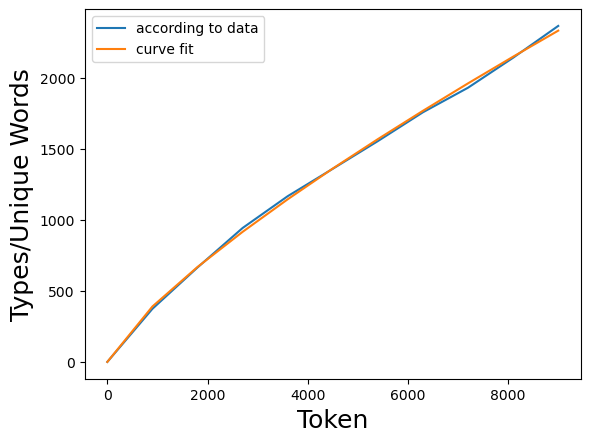

The estimated value of k is : 1.9828993274514835
The estimated value of beta is: 0.7765244072652925


In [59]:
heap_law(tokens)

# Zipf's Law

In [60]:
l2 = []
for word in tokens:
  word = word.lower()
  l2.append(word)


Text(0.5, 1.0, "Application of Zipf's Law for the text 'HSBC'")

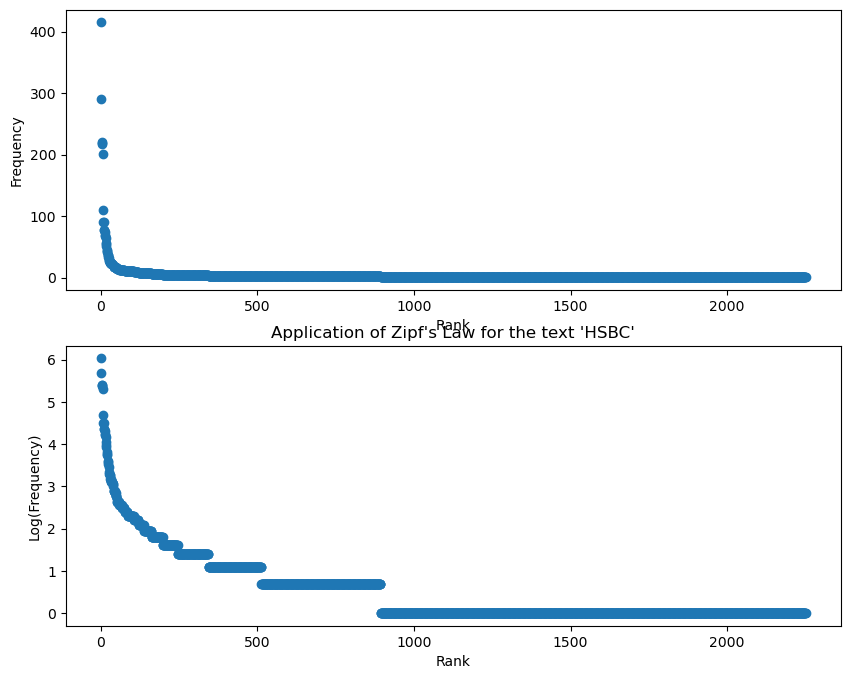

In [61]:
from collections import Counter
import math
def punc(text):
    exclude = set(string.punctuation)
    text = [''.join(x for x in y if x not in exclude) for y in text]
    text = [''.join(x.split()) for x in text]
    text = [x for x in text if x != '']
    return text

l2 = punc(l2)

#Term frequency
tf = Counter(l2)
values = [k for k,l in sorted([(j,i) for i,j in tf.items()], reverse=True)]
log_values = [math.log(k) for k,l in sorted([(j,i) for i,j in tf.items()], reverse = True)]
x = [i+1 for i in range(len(values))]
#plotting,
fig = plt.figure(figsize= (10,8))

plt.subplot(2,1,1)
plt.plot(x,values, 'o')
plt.xlabel('Rank')
plt.ylabel('Frequency')

plt.subplot(2,1,2)
plt.plot(x, log_values, 'o' )
plt.xlabel('Rank')
plt.ylabel('Log(Frequency)')

plt.title("Application of Zipf's Law for the text 'HSBC'")

# N-Grams

In [62]:
from nltk.util import bigrams, trigrams, ngrams


In [63]:
bigrams = list(nltk.bigrams(tokens))
len(bigrams) #no. of bigrams

9314

In [64]:
bigrams[:100]

[('HSBC', 'Holdings'),
 ('Holdings', 'plc'),
 ('plc', 'is'),
 ('is', 'a'),
 ('a', 'British'),
 ('British', 'multinational'),
 ('multinational', 'universal'),
 ('universal', 'bank'),
 ('bank', 'and'),
 ('and', 'financial'),
 ('financial', 'services'),
 ('services', 'holding'),
 ('holding', 'company'),
 ('company', '.'),
 ('.', 'It'),
 ('It', 'is'),
 ('is', 'the'),
 ('the', 'largest'),
 ('largest', 'bank'),
 ('bank', 'in'),
 ('in', 'Europe'),
 ('Europe', 'by'),
 ('by', 'total'),
 ('total', 'assets'),
 ('assets', 'ahead'),
 ('ahead', 'of'),
 ('of', 'BNP'),
 ('BNP', 'Paribas'),
 ('Paribas', ','),
 (',', 'with'),
 ('with', 'US'),
 ('US', '$'),
 ('$', '2.953'),
 ('2.953', 'trillion'),
 ('trillion', 'as'),
 ('as', 'of'),
 ('of', 'December'),
 ('December', '2021'),
 ('2021', '.'),
 ('.', '['),
 ('[', '6'),
 ('6', ']'),
 (']', 'In'),
 ('In', '2021'),
 ('2021', ','),
 (',', 'HSBC'),
 ('HSBC', 'had'),
 ('had', '$'),
 ('$', '10.8'),
 ('10.8', 'trillion'),
 ('trillion', 'in'),
 ('in', 'assets'),
 (

In [65]:
temp = set(bigrams)
unq_bigrams = list(temp)
unq_bigrams[:10]

[('its', 'Retail'),
 ('Kong', 'remains'),
 ('profit', ','),
 ('Holdings', '.'),
 ('a', 'third-party'),
 ('2011', ','),
 ('16', 'July'),
 ('in', '2012'),
 ('9.4', 'times'),
 ('facing', 'economic')]

In [66]:
#Number of unique bigrams
len(unq_bigrams)

6621

In [67]:
##########################
trigrams = list(nltk.trigrams(tokens))
len(trigrams)

9313

In [68]:
trigrams[:100]

[('HSBC', 'Holdings', 'plc'),
 ('Holdings', 'plc', 'is'),
 ('plc', 'is', 'a'),
 ('is', 'a', 'British'),
 ('a', 'British', 'multinational'),
 ('British', 'multinational', 'universal'),
 ('multinational', 'universal', 'bank'),
 ('universal', 'bank', 'and'),
 ('bank', 'and', 'financial'),
 ('and', 'financial', 'services'),
 ('financial', 'services', 'holding'),
 ('services', 'holding', 'company'),
 ('holding', 'company', '.'),
 ('company', '.', 'It'),
 ('.', 'It', 'is'),
 ('It', 'is', 'the'),
 ('is', 'the', 'largest'),
 ('the', 'largest', 'bank'),
 ('largest', 'bank', 'in'),
 ('bank', 'in', 'Europe'),
 ('in', 'Europe', 'by'),
 ('Europe', 'by', 'total'),
 ('by', 'total', 'assets'),
 ('total', 'assets', 'ahead'),
 ('assets', 'ahead', 'of'),
 ('ahead', 'of', 'BNP'),
 ('of', 'BNP', 'Paribas'),
 ('BNP', 'Paribas', ','),
 ('Paribas', ',', 'with'),
 (',', 'with', 'US'),
 ('with', 'US', '$'),
 ('US', '$', '2.953'),
 ('$', '2.953', 'trillion'),
 ('2.953', 'trillion', 'as'),
 ('trillion', 'as', 'of

In [69]:
temp1 = set(trigrams)
unq_trigrams = list(temp1)
unq_trigrams[:10]

[('[', '99', ']'),
 ('wholly', 'irresponsible', 'attack'),
 ('row', 'would', 'damage'),
 ('Corporation', 'by', 'an'),
 ('large', 'cash', 'withdrawals'),
 ('$', '1.1', 'billion'),
 ('44', ']', 'and'),
 ('the', 'Bermuda', 'Stock'),
 (')', ',', 'a'),
 ('committed', 'to', 'achieve')]

In [70]:
len(unq_trigrams)#no. of unique trigrams

8487

In [71]:
#####################################
four_grams = list(nltk.ngrams(tokens, 4))
len(four_grams)

9312

In [72]:
four_grams[1:100]

[('Holdings', 'plc', 'is', 'a'),
 ('plc', 'is', 'a', 'British'),
 ('is', 'a', 'British', 'multinational'),
 ('a', 'British', 'multinational', 'universal'),
 ('British', 'multinational', 'universal', 'bank'),
 ('multinational', 'universal', 'bank', 'and'),
 ('universal', 'bank', 'and', 'financial'),
 ('bank', 'and', 'financial', 'services'),
 ('and', 'financial', 'services', 'holding'),
 ('financial', 'services', 'holding', 'company'),
 ('services', 'holding', 'company', '.'),
 ('holding', 'company', '.', 'It'),
 ('company', '.', 'It', 'is'),
 ('.', 'It', 'is', 'the'),
 ('It', 'is', 'the', 'largest'),
 ('is', 'the', 'largest', 'bank'),
 ('the', 'largest', 'bank', 'in'),
 ('largest', 'bank', 'in', 'Europe'),
 ('bank', 'in', 'Europe', 'by'),
 ('in', 'Europe', 'by', 'total'),
 ('Europe', 'by', 'total', 'assets'),
 ('by', 'total', 'assets', 'ahead'),
 ('total', 'assets', 'ahead', 'of'),
 ('assets', 'ahead', 'of', 'BNP'),
 ('ahead', 'of', 'BNP', 'Paribas'),
 ('of', 'BNP', 'Paribas', ','),
 (

In [73]:
temp2 = set(four_grams)
unq_four_grams = list(temp2)
unq_four_grams

[('subsidiary', 'HSBC', 'Life', '('),
 ('committed', 'to', 'end', 'the'),
 ('loans', ',', 'pensions', 'and'),
 (']', 'From', '2009', 'to'),
 ('and', 'rates', ',', 'foreign'),
 ('billion', 'in', 'net', 'income'),
 (',', 'one', 'of', 'the'),
 ('banking', 'division', 'of', 'HSBC'),
 ('sponsor', 'of', 'the', 'World'),
 ('fake', 'receipts', 'and', 'dummy'),
 (']', 'In', '2018', ','),
 ('to', 'sell', 'its', 'general'),
 (')', ',', 'who', 'was'),
 ('25', 'April', '2011', ','),
 ('needs', 'of', 'high-net-worth', 'individuals'),
 ('arms', 'dealers', 'and', 'other'),
 (',', 'credit', 'cards', ','),
 ('across', 'Africa', ',', 'Asia'),
 ('in', 'August', '2015', 'that'),
 ('[', '103', ']', '•'),
 ('HSBC', 'Road', 'to', 'Wimbledon'),
 ('sensitive', 'information', 'and', 'trading'),
 ('[', '43', ']', '['),
 ('that', 'hundreds', 'of', 'banks'),
 ('itself', 'against', 'Palestinian', 'terror'),
 (']', '[', '180', ']'),
 ('as', 'chairman', 'by', 'Douglas'),
 ('trading', 'functionality', '.', 'The'),
 ('t

In [74]:
len(unq_four_grams)

8987

In [75]:
five_gram = list(nltk.ngrams(tokens, 5))
len(five_gram) #No. of unique four grams

9311

In [76]:
five_gram[1:100]

[('Holdings', 'plc', 'is', 'a', 'British'),
 ('plc', 'is', 'a', 'British', 'multinational'),
 ('is', 'a', 'British', 'multinational', 'universal'),
 ('a', 'British', 'multinational', 'universal', 'bank'),
 ('British', 'multinational', 'universal', 'bank', 'and'),
 ('multinational', 'universal', 'bank', 'and', 'financial'),
 ('universal', 'bank', 'and', 'financial', 'services'),
 ('bank', 'and', 'financial', 'services', 'holding'),
 ('and', 'financial', 'services', 'holding', 'company'),
 ('financial', 'services', 'holding', 'company', '.'),
 ('services', 'holding', 'company', '.', 'It'),
 ('holding', 'company', '.', 'It', 'is'),
 ('company', '.', 'It', 'is', 'the'),
 ('.', 'It', 'is', 'the', 'largest'),
 ('It', 'is', 'the', 'largest', 'bank'),
 ('is', 'the', 'largest', 'bank', 'in'),
 ('the', 'largest', 'bank', 'in', 'Europe'),
 ('largest', 'bank', 'in', 'Europe', 'by'),
 ('bank', 'in', 'Europe', 'by', 'total'),
 ('in', 'Europe', 'by', 'total', 'assets'),
 ('Europe', 'by', 'total', 'as

In [77]:
temp3 = set(five_gram)
unq_five_gram = list(temp3)
unq_five_gram[:100]

[('firm', '.', '[', '41', ']'),
 ('data', '.', '[', '79', ']'),
 ('300', 'million', 'in', 'legal', 'and'),
 ('.', '[', '22', ']', 'Major'),
 ('economy', ',', 'and', 'boost', 'cooperation'),
 ('over', 'foreign', 'business', 'community', 'in'),
 ('be', 'about', 'half', 'from', 'a'),
 ('had', 'just', 'lent', '£4', 'billion'),
 ('through', 'the', 'United', 'States', 'from'),
 ('of', 'the', 'Wimbledon', 'Championships', 'tennis'),
 (',', 'HSBC', 'Women', "'s", 'Champions'),
 ('in', 'deaths', 'by', 'organized-crime', 'gangs'),
 ('omitted', 'material', 'information', 'about', 'how'),
 (']', '[', '219', ']', 'In'),
 ('loans', ',', 'car', 'financing', ','),
 ('pay', '$', '352', 'million', 'to'),
 ('of', 'the', 'anniversary', 'of', 'the'),
 ("'s", 'Asia-Pacific', 'division', ',', 'Peter'),
 ('announced', 'that', 'it', 'would', 'acquire'),
 ('the', 'succession', 'planning', 'and', 'investors'),
 ('to', 'have', 'refused', 'large', 'cash'),
 ('Post', 'reported', 'that', 'HSBC', 'confirmed'),
 ('the

In [78]:
len(unq_five_gram) #No of unique Five grams

9146

# Training Model



In [79]:
listOfBigrams = []
bigramCounts = {}
unigramCounts = {}
def createBigram(data):
   for i in range(len(data)-1):
      if i < len(data) - 1 and data[i+1].islower():

         listOfBigrams.append((data[i], data[i + 1]))

         if (data[i], data[i+1]) in bigramCounts:
            bigramCounts[(data[i], data[i + 1])] += 1
         else:
            bigramCounts[(data[i], data[i + 1])] = 1

      if data[i] in unigramCounts:
         unigramCounts[data[i]] += 1
      else:
         unigramCounts[data[i]] = 1
   return listOfBigrams, unigramCounts, bigramCounts


def calcBigramProb(listOfBigrams, unigramCounts, bigramCounts):
    listOfProb = {}
    for bigram in listOfBigrams:
        word1 = bigram[0]
        word2 = bigram[1]
        listOfProb[bigram] = (bigramCounts.get(bigram))/(unigramCounts.get(word1))
    return listOfProb


In [80]:
createBigram(tokens)

([('Holdings', 'plc'),
  ('plc', 'is'),
  ('is', 'a'),
  ('British', 'multinational'),
  ('multinational', 'universal'),
  ('universal', 'bank'),
  ('bank', 'and'),
  ('and', 'financial'),
  ('financial', 'services'),
  ('services', 'holding'),
  ('holding', 'company'),
  ('It', 'is'),
  ('is', 'the'),
  ('the', 'largest'),
  ('largest', 'bank'),
  ('bank', 'in'),
  ('Europe', 'by'),
  ('by', 'total'),
  ('total', 'assets'),
  ('assets', 'ahead'),
  ('ahead', 'of'),
  (',', 'with'),
  ('2.953', 'trillion'),
  ('trillion', 'as'),
  ('as', 'of'),
  ('HSBC', 'had'),
  ('10.8', 'trillion'),
  ('trillion', 'in'),
  ('in', 'assets'),
  ('assets', 'under'),
  ('under', 'custody'),
  (')', 'and'),
  ('4.9', 'trillion'),
  ('trillion', 'in'),
  ('in', 'assets'),
  ('assets', 'under'),
  ('under', 'administration'),
  (',', 'respectively'),
  ('HSBC', 'traces'),
  ('traces', 'its'),
  ('its', 'origin'),
  ('origin', 'to'),
  ('to', 'a'),
  ('a', 'hong'),
  ('hong', 'in'),
  (',', 'and'),
  ('and

In [81]:
bigramProb = calcBigramProb(listOfBigrams, unigramCounts, bigramCounts)
bigramProb

{('Holdings', 'plc'): 0.3333333333333333,
 ('plc', 'is'): 0.25,
 ('is', 'a'): 0.17647058823529413,
 ('British', 'multinational'): 0.1,
 ('multinational', 'universal'): 1.0,
 ('universal', 'bank'): 1.0,
 ('bank', 'and'): 0.017241379310344827,
 ('and', 'financial'): 0.004545454545454545,
 ('financial', 'services'): 0.45454545454545453,
 ('services', 'holding'): 0.058823529411764705,
 ('holding', 'company'): 1.0,
 ('It', 'is'): 0.058823529411764705,
 ('is', 'the'): 0.17647058823529413,
 ('the', 'largest'): 0.013888888888888888,
 ('largest', 'bank'): 0.09090909090909091,
 ('bank', 'in'): 0.06896551724137931,
 ('Europe', 'by'): 0.25,
 ('by', 'total'): 0.014925373134328358,
 ('total', 'assets'): 0.3333333333333333,
 ('assets', 'ahead'): 0.125,
 ('ahead', 'of'): 1.0,
 (',', 'with'): 0.017857142857142856,
 ('2.953', 'trillion'): 1.0,
 ('trillion', 'as'): 0.2,
 ('as', 'of'): 0.022222222222222223,
 ('HSBC', 'had'): 0.02304147465437788,
 ('10.8', 'trillion'): 1.0,
 ('trillion', 'in'): 0.6,
 ('in'

In [82]:
inputList = input('Give the sentence to check Probablitiy: ')

Give the sentence to check Probablitiy: HSBC in


In [83]:
print("\n Bigrams along with their probability ")

splt=inputList.split()
outputProb1 = 1
bilist=[]
bigrm=[]

for i in range(len(splt) - 1):
  if i < len(splt) - 1:
    bilist.append((splt[i], splt[i + 1]))

print("\n The bigrams in given sentence are ")
print(bilist)

for i in range(len(bilist)):
  if bilist[i] in bigramProb:
    outputProb1 *= bigramProb[bilist[i]]
  else:
    outputProb1 *= 0

print('\n' + 'Probablility of sentence = ' + str(outputProb1))


 Bigrams along with their probability 

 The bigrams in given sentence are 
[('HSBC', 'in')]

Probablility of sentence = 0.004608294930875576
